# Taller Evaluado de Aprendizaje No Supervisado

# COVID 19

## Minería de Datos 2020

**Disclaimer**: Este taller utiliza datos oficiales del COVID-19, pandemia en curso que ha causado muchas y lamentables muertes a connacionales y en todo el mundo. El objetivo de trabajar con estos datos es mostrar la relevancia de las competencias del ramo para un mundo que toma decisiones importantes en base a la minería de datos. Sin embargo, *evite generarse opiniones o juicios en base a las conclusiones de este ejercicio*. Son los expertos en epidemiología, en salud pública, y los cientistas de datos que llevan decadas de experiencia los llamados a analizar estos datos con la debida seriedad que se merece la situación. Además, siempre recuerde que correlación (que analizamos aquí) no implica causalidad necesariamente.

# Nombre
# ROL

### 1.- Selección y Descripción de Datos  

**1.1**- Descargue comma separated values ``comuna.csv`` del aula virtual (mismo lugar donde encontró este archivo). Este CSV contiene datos sobre la pandemia, y corresponden al Data Product 1 de la Mesa de Datos COVID-19 del Ministerio de Ciencia: https://github.com/MinCiencia/Datos-COVID19.


**PREGUNTA**: Escriba aquí en markdown una breve descripción de los datos que resuma la descripción que entrega el MinCiencia. ¿Cuáles features son númericos y cuáles categóricos?

**1.2**- Cargue el archivo en un DataFrame pandas. 
* Elimine todos los samples (muestras) que tengan valores NaN (o impútelos si es valiente)
* Imprima las estadísticas básicas de su dataset (media, varianza, máximos y mínimos) y su cabecera y cola para verificar el contenido
* Imprima como ha variado la cantidad de casos en promedio por comuna con su respectivo intervalo de confianza (hint: fill_between)

In [1]:
import pandas as pd

table = pd.read_csv('comuna.csv')
table

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,2020-04-10,2020-04-13,2020-04-15,2020-04-17,2020-04-20,2020-04-24,2020-04-27,2020-05-01,2020-05-04,Tasa
0,Arica y Parinacota,15,Arica,15101,247552.0,6.0,6.0,12.0,41.0,63.0,87.0,115.0,124.0,134.0,166.0,224.0,270.0,297.0,310.0,125.2
1,Arica y Parinacota,15,Camarones,15102,1233.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Arica y Parinacota,15,General Lagos,15202,810.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Arica y Parinacota,15,Putre,15201,2515.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Tarapacá,1,Alto Hospicio,1107,129999.0,0.0,0.0,0.0,5.0,6.0,10.0,14.0,15.0,16.0,27.0,39.0,55.0,77.0,128.0,98.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,Magallanes,12,Punta Arenas,12101,141984.0,29.0,87.0,143.0,203.0,207.0,299.0,387.0,416.0,470.0,516.0,581.0,623.0,685.0,744.0,524.0
342,Magallanes,12,Rio Verde,12103,211.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
343,Magallanes,12,San Gregorio,12104,681.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
344,Magallanes,12,Timaukel,12303,282.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
numeric=table.describe().columns
table=table.fillna(value=0)
desc=table.describe()
desc

,Codigo region,Codigo comuna,Poblacion,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,2020-04-10,2020-04-13,2020-04-15,2020-04-17,2020-04-20,2020-04-24,2020-04-27,2020-05-01,2020-05-04,Tasa
count,346.000000,346.000000,346.000000,346.000000,346.000000,346.00000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000
mean,8.797688,9034.997110,56237.890173,5.598266,8.141618,10.15896,13.254335,15.300578,18.138728,21.621387,23.595376,26.658960,30.190751,35.289017,39.606936,49.069364,59.375723,64.515607
std,3.847016,3818.147431,88945.967089,18.947155,25.224560,31.03781,38.455380,42.803249,49.523508,56.388132,61.195845,68.931845,76.532638,88.348209,97.790823,120.227807,148.801971,104.785968
min,1.000000,1101.000000,137.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,6109.250000,9649.250000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,5.225000
50%,8.000000,8313.500000,19770.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,3.000000,3.000000,4.000000,4.000000,5.000000,5.000000,6.000000,6.000000,28.150000
75%,13.000000,13102.750000,55441.250000,0.000000,5.000000,6.75000,9.000000,11.000000,12.000000,14.000000,14.750000,15.750000,18.750000,22.000000,22.000000,25.500000,30.500000,82.650000
max,16.000000,16305.000000,645909.000000,181.000000,225.000000,293.00000,365.000000,407.000000,443.000000,471.000000,506.000000,547.000000,605.000000,688.000000,764.000000,980.000000,1294.000000,958.100000


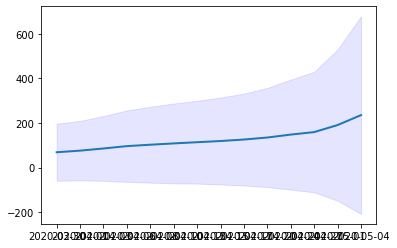

In [3]:
import matplotlib.pyplot as plt
days = ['2020-03-30',
       '2020-04-01', '2020-04-03', '2020-04-06', '2020-04-08', '2020-04-10',
       '2020-04-13', '2020-04-15', '2020-04-17', '2020-04-20', '2020-04-24',
       '2020-04-27', '2020-05-01', '2020-05-04']
m=desc[days].mean()
s=desc[days].std()
plt.plot(days,m, linewidth=2) #mean curve.
plt.fill_between(s.index, m-s, m+s, color='b', alpha=.1)

**PREGUNTA**: ¿Qué significa que la varianza aumente? ¿Por qué usted cree que la media es un mal estimador en este caso?

**1.3**- Agrupe los datos por región e imprima las estadísticas (describe) de cada regíon *solo para las columnas referentes a los días*. Grafique la tendencia de contagios (x=días, y=contagios) por región.


In [4]:
days = ['2020-03-30',
       '2020-04-01', '2020-04-03', '2020-04-06', '2020-04-08', '2020-04-10',
       '2020-04-13', '2020-04-15', '2020-04-17', '2020-04-20', '2020-04-24',
       '2020-04-27', '2020-05-01', '2020-05-04']
table.groupby('Region')[days].describe()

2020-03-30                                               \
                        count       mean        std  min  25%   50%    75%   
Region                                                                       
Antofagasta               9.0   3.222222   9.666667  0.0  0.0   0.0   0.00   
Araucanía                32.0   5.843750  27.135395  0.0  0.0   0.0   0.00   
Arica y Parinacota        4.0   1.500000   3.000000  0.0  0.0   0.0   1.50   
Atacama                   9.0   0.000000   0.000000  0.0  0.0   0.0   0.00   
Aysén                    10.0   0.000000   0.000000  0.0  0.0   0.0   0.00   
Biobío                   33.0   2.181818   5.991945  0.0  0.0   0.0   0.00   
Coquimbo                 15.0   1.400000   4.436859  0.0  0.0   0.0   0.00   
Los Lagos                30.0   3.466667  13.348727  0.0  0.0   0.0   0.00   
Los Ríos                 12.0   1.000000   3.464102  0.0  0.0   0.0   0.00   
Magallanes               11.0   3.090909   8.723010  0.0  0.0   0.0   0.00   
Maule                    30.0   1.600000   6.289564  0.0  0.0   0.0   0.00   
Metropolitana            52.0  22.692308  33.987621  0.0  3.0  11.5  24.25   
O’Higgins                33.0   0.212121   1.218544  0.0  0.0   0.0   0.00   
Tarapacá                  7.0   0.714286   1.889822  0.0  0.0   0.0   0.00   
Valparaíso               38.0   2.131579   5.700503  0.0  0.0   0.0   0.00   
Ñuble                    21.0   7.190476  24.802458  0.0  0.0   0.0   0.00   

                          2020-04-01             ... 2020-05-01         \
                      max      count       mean  ...        75%    max   
Region                                           ...                     
Antofagasta          29.0        9.0   3.555556  ...      71.00  378.0   
Araucanía           154.0       32.0   9.125000  ...      25.50  673.0   
Arica y Parinacota    6.0        4.0   1.500000  ...      74.25  297.0   
Atacama               0.0        9.0   0.000000  ...       7.00   19.0   
Aysén                 0.0       10.0   0.000000  ...       0.75    2.0   
Biobío               28.0       33.0   6.787879  ...      20.00  147.0   
Coquimbo             17.0       15.0   1.533333  ...       8.50   29.0   
Los Lagos            66.0       30.0   5.633333  ...       8.75  306.0   
Los Ríos             12.0       12.0   4.500000  ...      10.00  110.0   
Magallanes           29.0       11.0   8.818182  ...       8.00  685.0   
Maule                34.0       30.0   1.833333  ...      12.25  160.0   
Metropolitana       181.0       52.0  28.519231  ...     263.75  980.0   
O’Higgins             7.0       33.0   0.515152  ...       4.00   38.0   
Tarapacá              5.0        7.0   1.285714  ...      54.00   90.0   
Valparaíso           29.0       38.0   2.921053  ...      16.00  123.0   
Ñuble               114.0       21.0  11.666667  ...      35.00  414.0   

                   2020-05-04                                             \
                        count        mean         std  min    25%    50%   
Region                                                                     
Antofagasta               9.0   83.222222  154.722960  0.0   4.00   13.0   
Araucanía                32.0   41.406250  120.291544  0.0   4.75    6.5   
Arica y Parinacota        4.0   77.500000  155.000000  0.0   0.00    0.0   
Atacama                   9.0    8.000000   12.469964  0.0   1.00    1.0   
Aysén                    10.0    0.400000    0.699206  0.0   0.00    0.0   
Biobío                   33.0   23.000000   39.084044  0.0   1.00    4.0   
Coquimbo                 15.0    6.933333   10.457169  0.0   0.00    1.0   
Los Lagos                30.0   16.766667   57.419619  0.0   0.00    1.0   
Los Ríos                 12.0   16.666667   34.591994  0.0   1.00    3.5   
Magallanes               11.0   71.000000  223.288155  0.0   0.00    1.0   
Maule                    30.0   13.766667   29.802434  0.0   2.00    4.5   
Metropolitana            52.0  259.096154  260.905006  0.0  73.50

<IPython.core.display.Javascript object>


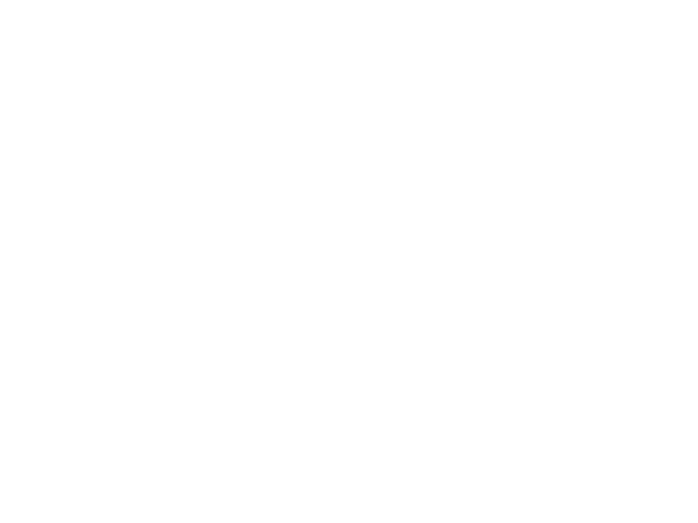

In [5]:
%matplotlib notebook
grp=table.groupby('Region')
grp[days].sum().T.plot(logy=True)

**PREGUNTA**: ¿Tiene alguna conclusión usted respecto a las regiones? (hint: hay que aplicar escala logarítmica para visualizar datos exponenciales)

### 2- Reducción de Dimensionalidad y Visualización

**2.1**- Compute la matriz de correlaciones del DataFrame original (sólo valores numéricos) y presentela gráficamente como un mapa de calor. 

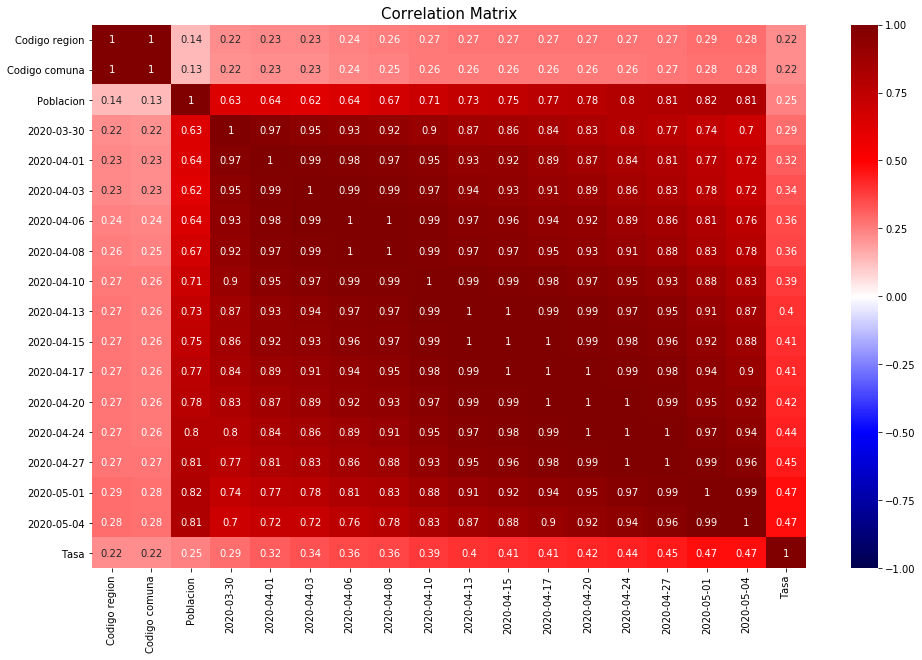

In [6]:
%matplotlib inline
import seaborn as sns
def plot_corr_matrix(data,features=None,annot=True,s=(16,10)):
    fig= plt.figure(figsize=s)
    ax= fig.add_subplot(111)
    if features is None:
        corr = data.corr()
    else:
        corr = data[features].corr()
    ax= sns.heatmap(corr,annot=annot,
                    xticklabels=corr.columns,
                    yticklabels=corr.columns, cmap="seismic",vmin=-1,vmax=1)
    plt.title("Correlation Matrix", fontsize = 15)
    plt.show()
    return
plot_corr_matrix(table,features=numeric)

**PREGUNTA**: ¿Qué estructura tiene la matriz? ¿Qué patrón general usted identifica? ¿Qué puede usted intuir respuesto a la columna de población?

**2.2**- Aplique el Análisis de Componentes Principales considerando 5 componentes. Grafique las proyecciones 2D de las 5 dimensiones PCA con la variable ``Region`` como descriptor de color de los puntos. Además, indique cuanto de la varianza se explica con estas 5 dimensiones y muestre la matriz de correlación de esas 5 dimensiones.

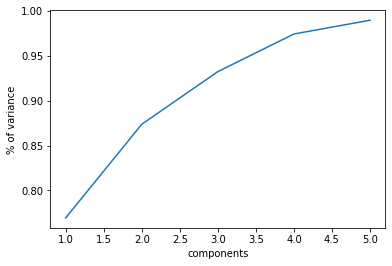

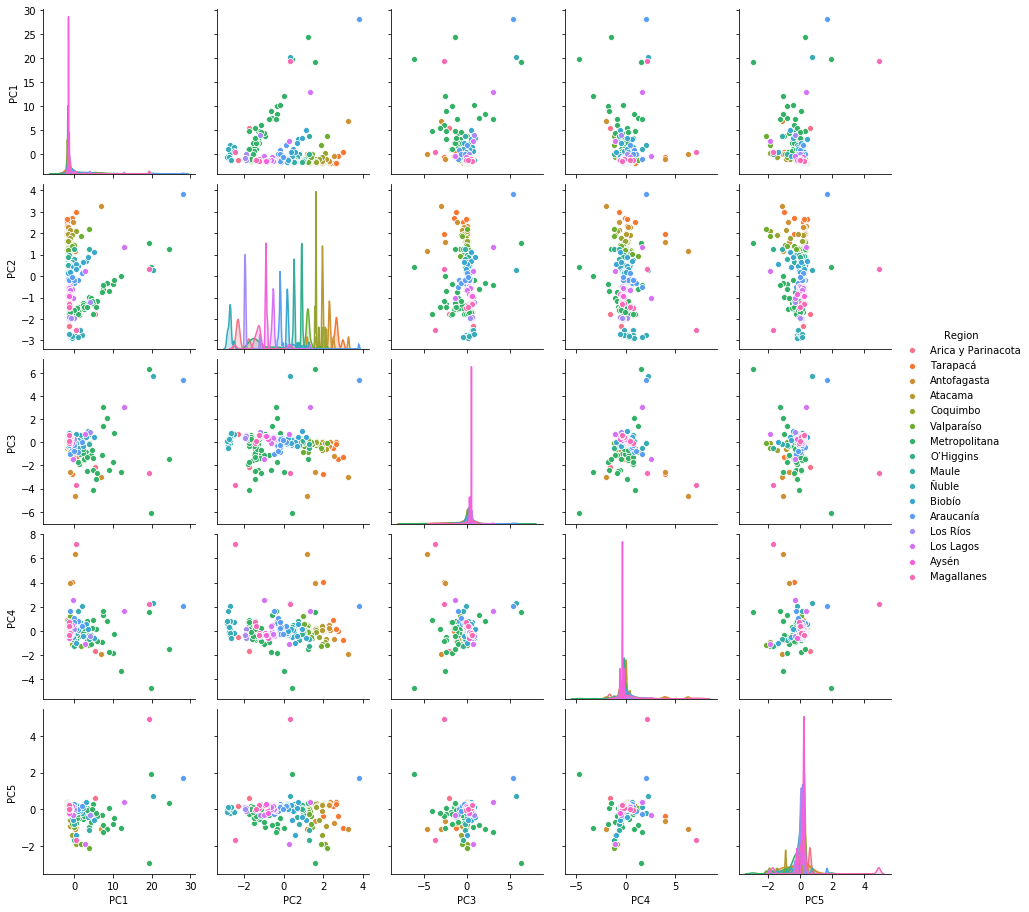

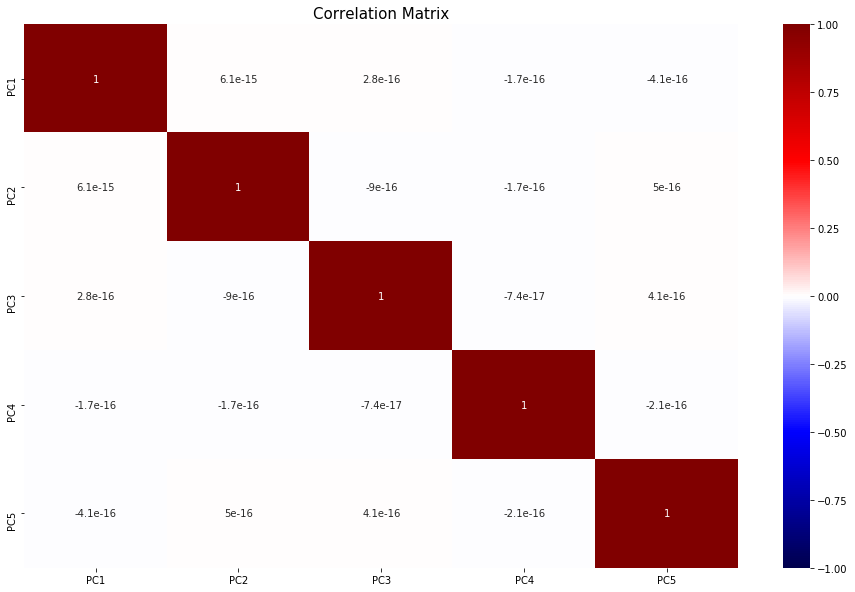

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler

def do_PCA(n, table, categorical, features=None, show_variance=False):
    pca = decomposition.PCA(n_components=n)
    if features is None:
        scaler = StandardScaler().fit(table)
        stdtab = pd.DataFrame(scaler.transform(table))
    else:
        scaler = StandardScaler().fit(table[features])
        stdtab = pd.DataFrame(scaler.transform(table[features]))
    pca.fit(stdtab)
    table_pca_df = pca.transform(stdtab)
    
    if (show_variance):
        varx = pca.explained_variance_ratio_
        plt.plot(np.arange(1,n+1),varx.cumsum())
        plt.ylabel("% of variance")
        plt.xlabel("components")

    ind_pca = []
    for i in range(n):
        ind_pca.append("PC"+str(i+1))
    
    table_pca = pd.DataFrame(table_pca_df, columns=ind_pca).dropna()
    PCA_features = [categorical]
    for i in range(n):
        table["PC"+str(i+1)] = table_pca["PC"+str(i+1)]
        PCA_features.append("PC"+str(i+1))

    sns.pairplot(table[PCA_features].dropna(), hue=categorical)
    plot_corr_matrix(table[PCA_features].dropna(),PCA_features)
    return

do_PCA(5, table, 'Region', numeric, show_variance=True)

**PREGUNTA**: Ocupe estos 3 gráficos para argumentar lo pertinente de PCA en este caso.

### 3- Clustering 
**3.1** Aplique al menos dos algoritmos de clustering a las dimensiones salidas del PCA. Si el algoritmo lo requiere, fije la cantidad de clusters a 3. Grafique los restultados ocupando proyecciones a 2D con colores por cluster.

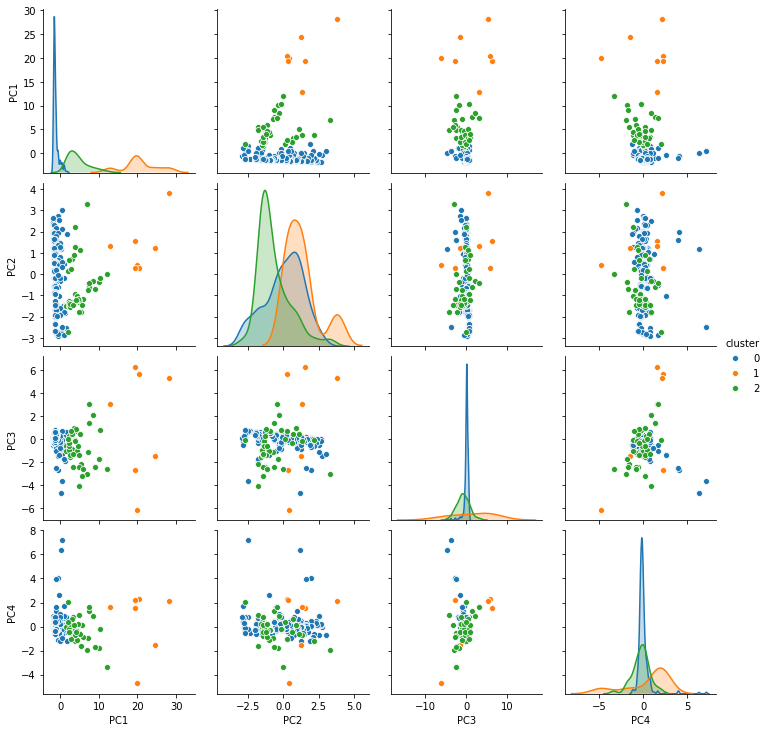

In [8]:
from sklearn.cluster import KMeans

def do_KMEANS(clusters, table, model, n, save_cluster = False):
    if (model == "PCA"):
        ind_pca = []
        for i in range(n):
            ind_pca.append("PC"+str(i+1))
        pca = table[ind_pca]
        km = KMeans(clusters).fit(pca)
        km_table = pd.DataFrame(pca, columns = ind_pca)
        km_table["cluster"] = km.labels_
        if (save_cluster):
            table["clusterPCA"] = km.labels_
        sns.pairplot(km_table, vars=ind_pca, hue="cluster")
    elif (model== "TSNE"):
        ind_tsne = []
        for i in range(n):
            ind_tsne.append("t-SNE"+str(i+1))
        tsne = table[ind_tsne]
        km = KMeans(clusters).fit(tsne)
        km_table = pd.DataFrame(tsne, columns = ind_tsne)
        km_table["cluster"] = km.labels_
        if (save_cluster):
            table["clusterTSNE"] = km.labels_
        sns.pairplot(km_table, vars=ind_tsne, hue="cluster")
    return

table = table.dropna()
do_KMEANS(3, table, "PCA", 4,save_cluster=True)
#do_KMEANS(4, table, "TSNE", 4)

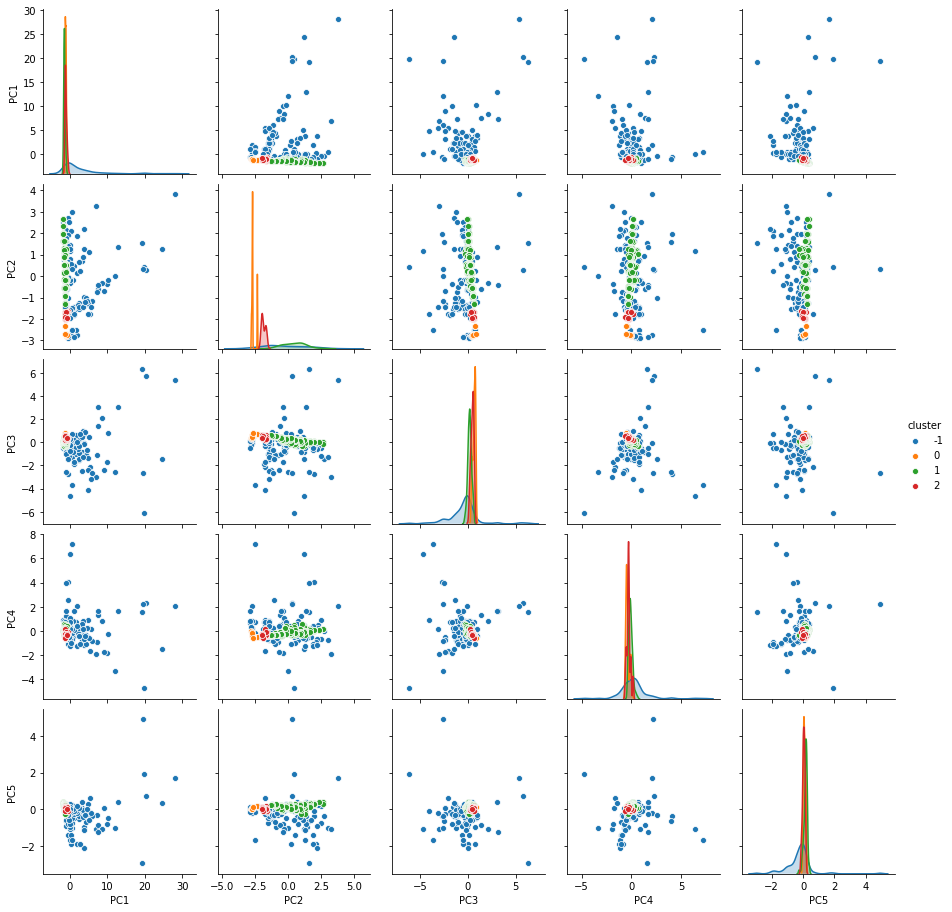

In [9]:
from sklearn.cluster import DBSCAN

def do_DBSCAN(rad, samples, table, model, n):
    if (model == "PCA"):
        ind_pca = []
        for i in range(n):
            ind_pca.append("PC"+str(i+1))
        pca = table[ind_pca].dropna()
        db = DBSCAN(rad, min_samples = samples).fit(pca)
        db_table = pd.DataFrame(pca, columns = ind_pca)
        db_table["cluster"] = db.labels_
        sns.pairplot(db_table, vars=ind_pca, hue="cluster")
    elif (model== "TSNE"):
        ind_tsne = []
        for i in range(n):
            ind_tsne.append("t-SNE"+str(i+1))
        tsne = table[ind_tsne].dropna()
        db = DBSCAN(rad, min_samples=samples).fit(tsne)
        db_table = pd.DataFrame(tsne, columns = ind_tsne)
        db_table["cluster"] = db.labels_
        sns.pairplot(db_table, vars=ind_tsne, hue="cluster")
    return

do_DBSCAN(0.4, 5, table, "PCA", 5)

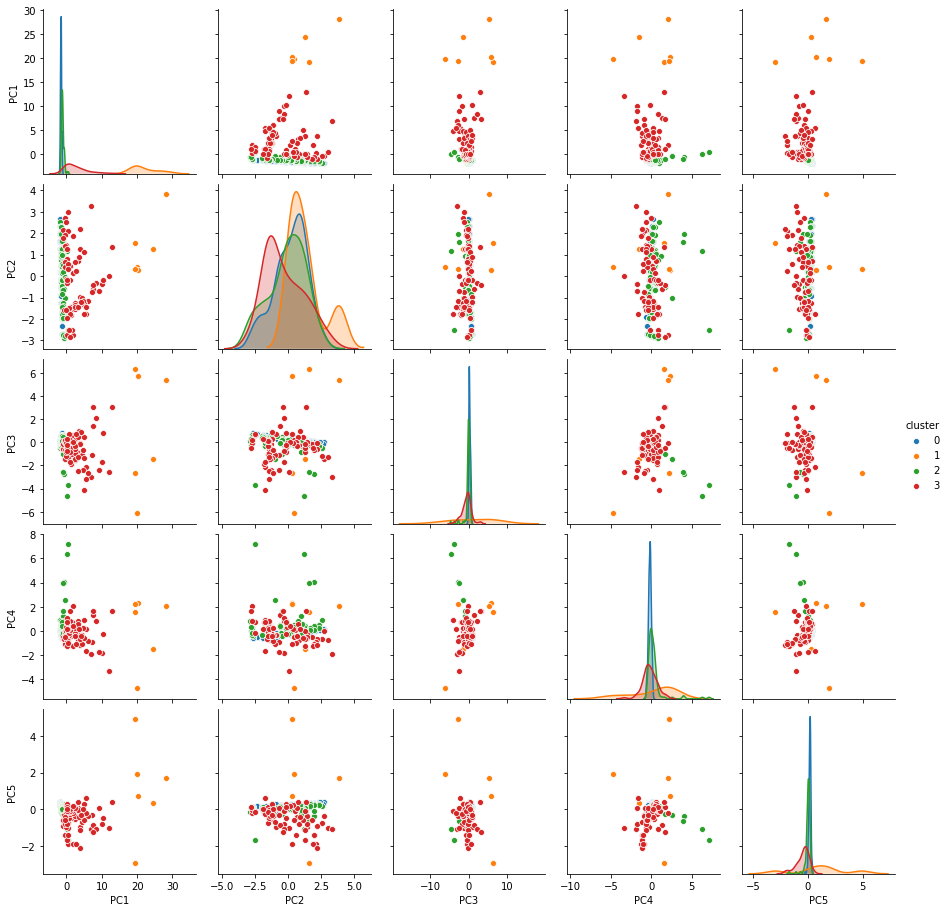

In [10]:
from sklearn.cluster import SpectralClustering
from sklearn.mixture import  GaussianMixture

def do_spectral(clusters, samples, table, model, n):
    if (model == "PCA"):
        ind_pca = []
        for i in range(n):
            ind_pca.append("PC"+str(i+1))
        pca = table[ind_pca].dropna()
        db = GaussianMixture(n_components=clusters).fit(pca)
        db_table = pd.DataFrame(pca, columns = ind_pca)
        db_table["cluster"] = db.predict(pca)
        sns.pairplot(db_table, vars=ind_pca, hue="cluster")
    elif (model== "TSNE"):
        ind_tsne = []
        for i in range(n):
            ind_tsne.append("t-SNE"+str(i+1))
        tsne = table[ind_tsne].dropna()
        db = SpectralClustering(n_clusters=clusters).fit(pca)
        db_table = pd.DataFrame(tsne, columns = ind_tsne)
        db_table["cluster"] = db.labels_
        sns.pairplot(db_table, vars=ind_tsne, hue="cluster")
    return db_table

db=do_spectral(4, 5, table, "PCA", 5)

In [11]:


GaussianMixture?

**PREGUNTA**: ¿Qué algoritmo se parece más adecuado cualitativamente? Seleccione este algoritmo para la siguiente pregunta. Tenga presente que comparar cuantitativamente clusters es complejo (muy posible!, pero aún no lo hemos visto).

**3.2** Revise cuales son y cambie fundadamente el/los parámetros del algoritmo.  (2 o 3 variaciones)

**PREGUNTA**: ¿Cuál es el mejor conjunto de parámetros? Jusitifque brevemente.

**3.3** Muestre las tablas con la información de los features y samples de cada cluster (máximo 3) utilizando el mejor conjunto de datos.

In [12]:
table[db['cluster']==3]

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,...,2020-04-27,2020-05-01,2020-05-04,Tasa,PC1,PC2,PC3,PC4,PC5,clusterPCA
0,Arica y Parinacota,15,Arica,15101,247552.0,6.0,6.0,12.0,41.0,63.0,...,270.0,297.0,310.0,125.2,5.495398,-1.778804,-2.121688,-1.611020,0.613707,2
4,Tarapacá,1,Alto Hospicio,1107,129999.0,0.0,0.0,0.0,5.0,6.0,...,55.0,77.0,128.0,98.5,-0.421567,2.731819,-1.474896,-0.012398,-0.368207,0
8,Tarapacá,1,Iquique,1101,223463.0,5.0,9.0,10.0,13.0,16.0,...,75.0,90.0,122.0,54.6,0.460115,2.999537,-1.270391,-0.703413,-1.006527,0
11,Antofagasta,2,Antofagasta,2101,425725.0,29.0,32.0,44.0,54.0,60.0,...,303.0,378.0,479.0,112.5,6.885451,3.282136,-3.033481,-1.932733,-1.104768,2
12,Antofagasta,2,Calama,2201,190336.0,0.0,0.0,5.0,7.0,8.0,...,54.0,71.0,84.0,44.1,-0.246061,2.521309,-1.153526,-0.682268,-0.746753,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,Araucanía,9,Vilcun,9119,30766.0,4.0,5.0,11.0,18.0,20.0,...,39.0,44.0,45.0,146.3,0.098665,-0.179279,-0.256864,0.774542,0.134724,0
285,Los Ríos,14,La Union,14201,39538.0,0.0,9.0,10.0,17.0,18.0,...,29.0,32.0,39.0,98.6,0.012875,-1.941533,0.258358,0.172889,0.000175,0
294,Los Ríos,14,Valdivia,14101,176774.0,12.0,45.0,47.0,65.0,72.0,...,107.0,110.0,121.0,68.4,4.071171,-1.223640,0.893459,-0.433242,-0.320095,2
310,Los Lagos,10,Osorno,10301,173410.0,66.0,120.0,163.0,190.0,207.0,...,282.0,306.0,315.0,181.7,12.950205,1.344996,3.065687,1.622085,0.378821,1


**PREGUNTA FINAL**: Ponga un nombre identificativo a los 3 clusters, y explique **muy** brevemente si correspondería o no tomar medidas diferenciadas para cada cluster.